In [1]:
import numpy as np
import pandas as pd

In [2]:
stvl_fff14j = pd.read_csv('data/stvl_fff14j.csv')

In [3]:
stas_fff14j = pd.read_csv('data/stas_fff14j.csv')

In [4]:
ass_fff14j = pd.read_csv('data/ass_fff14j.csv')

In [5]:
ass_fff14j.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,FFF,2014J,34904,CMA,241.0,0.0
1,FFF,2014J,34905,CMA,241.0,0.0
2,FFF,2014J,34906,CMA,241.0,0.0
3,FFF,2014J,34907,CMA,241.0,0.0
4,FFF,2014J,34908,CMA,241.0,0.0


In [6]:
stas_fff14j.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,34899,560047,24,0,84.0
1,34899,560459,29,0,48.0
2,34899,560645,23,0,100.0
3,34899,560765,23,0,78.0
4,34899,561231,22,0,80.0


In [7]:
stvl_fff14j.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,FFF,2014J,2398260,883041,-18,1
1,FFF,2014J,2398260,882602,-18,1
2,FFF,2014J,2398260,882587,-18,2
3,FFF,2014J,2398260,883142,-18,1
4,FFF,2014J,2398260,883092,-18,1


# Similarity method

In [14]:
df = stvl_fff14j.pivot_table(values='sum_click', index='id_student', columns='id_site')

In [15]:
df.head()

id_site,882537,882545,882547,882549,882550,882551,882552,882553,882554,882555,...,883302,883303,883304,883306,937371,937372,941543,973777,1004809,1011388
id_student,,,,,,,,,,,,,,,,,,,,,
31296,2.809524,1.666667,NaN,2.0,1.000000,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,4.6,NaN,5.166667,19.25,NaN,NaN
35747,4.619048,3.076923,3.285714,NaN,5.500000,9.1,NaN,1.0,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35796,3.806452,2.851852,2.571429,NaN,1.000000,2.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40857,4.941176,2.357143,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40878,3.848837,2.705128,2.285714,NaN,2.333333,2.9,NaN,NaN,3.333333,NaN,...,NaN,NaN,NaN,2.5,1.0,NaN,1.000000,1.00,NaN,NaN


Min number of clicks: 1


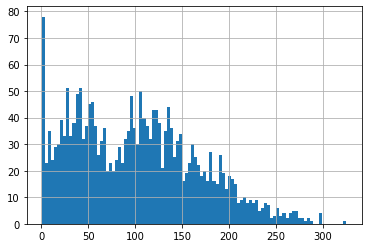

In [17]:
clicks = (df > 0).sum(axis=1)
clicks.hist(bins=100)
print('Min number of clicks: {}'.format(clicks.min()))

Min number of clicks: 1


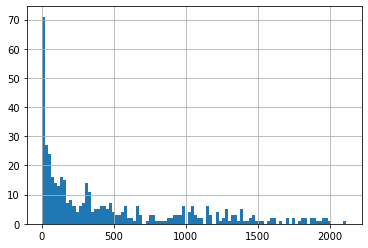

In [19]:
clicks = (df > 0).sum(axis=0)
clicks.hist(bins=100)
print('Min number of clicks: {}'.format(clicks.min()))

# Basic top student neighborhood based on agg score

In [13]:
len(stas_fff14j.groupby(['id_student'])['score'].sum())

1843

In [22]:
stas_fff14j['id_student'].nunique()

1843

In [26]:
sort_stu = stas_fff14j.groupby(['id_student'])['score'].sum().sort_values(ascending=False)
sort_stu.head()

id_student
537811    1187.0
680027    1178.0
692612    1165.0
652064    1155.0
620094    1154.0
Name: score, dtype: float64

In [27]:
best_stu = sort_stu[:185]

In [42]:
top_students = best_stu.keys().tolist()

In [46]:
best_stvl = stvl_fff14j[stvl_fff14j.id_student.isin(top_students)]

In [51]:
# sanity check
len(best_stvl.groupby(['id_student'])['id_student'].apply(min))

185

In [52]:
best_stvl.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
31,FFF,2014J,2386732,882537,-18,2
32,FFF,2014J,2386732,883037,-18,2
33,FFF,2014J,2386732,883064,-18,4
34,FFF,2014J,2293511,883142,-18,1
36,FFF,2014J,2293511,882654,-18,1


# EDA
# EDA
# EDA